# CREDIT RISK MODELLING TO PREDICT LOAN DEFAULTS

In this project, I have addressed the problem of classifying highly unbalanced data using supervised machine learning algorithms. Unbalanced data is ubiquitous in nature, it’s dealt with in a wide range of fields including but not limited to that of business, bioinformatics, engineering and banking sector. We have focussed here on Credit Risk, which is defined as risk of default on a debt that may arise from a borrower failing to make required payments.

In the first resort, the risk is that of the lender and includes lost principal and interest, disruption to cash flows, and increased collection costs. Usually in a Credit Risk problem, loan default is a rare phenomenon and that is why we have such unbalanced data.

Here, we have tried to **solve the problem of unbalanced data with the help of Logistic Regression and Classification and Regression Trees(CART).We have used techniques such Prior Probabilities, Loss Matrix and Matrix Weighing to deal with unbalanced data.**

# ABOUT THE DATA 

The data set is from a bank where data about customers was collected on a yearly basis for analysis. In our data set, we have 8 variables.

**loan_status** : A Categorical variable which represents 0 if the customer is a non-defaulter and 1 as defaulter.

**loan_amnt** : A Numerical variable which tells us about the last loan amount taken by the said customer.

**ir_cat** : A Numerical variable which tells us about the interest rate of the last loan amount taken by the customer.

**grade** : A Categorical variable which tells us how important the customer is to the bank with A being highly important and G being least important.

**emp_cat** : A Numerical variable which tells us about for how long the customer has been working at his/her current workplace.

**home_ownership** : A Categorical variable which tells us about the type of house owned by the customer.

**annual_inc** : A Numerical variable which tells us about the Annual income of the customer.

**age** : A Numerical variable which tells us about the age of the customer.

# LOADING DATA AND EXPLONATORY DATA ANALYSIS 

Let us now load the neccessary libraries for perfroming Data Visualization and Data Pre-processing.

In [1]:
# Data Preprocessing and Data Visualization

library(readxl, warn.conflicts = FALSE) # loading the excel package

library(gmodels,warn.conflicts = FALSE) # Loading gmodels for modelling

library(ggplot2,warn.conflicts = FALSE) # Loading ggplot2 for visualization

library(dplyr)

library(ggdark)

Warning message:
"package 'gmodels' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggdark' was built under R version 3.6.3"

In [2]:
loan_data <- readRDS('loan_data_ch2.rds') # loan_data is our primary loan data set

Let's find more about the dataset at hand by inspecting it's structure and the first 20 rows in the dataset.

In [3]:
str(loan_data)

head(loan_data, n = 20)

'data.frame':	29091 obs. of  8 variables:
 $ loan_status   : int  0 0 0 0 0 0 1 0 1 0 ...
 $ loan_amnt     : int  5000 2400 10000 5000 3000 12000 9000 3000 10000 1000 ...
 $ grade         : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 1 5 2 3 2 2 4 ...
 $ home_ownership: Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 4 4 4 3 4 4 4 4 ...
 $ annual_inc    : num  24000 12252 49200 36000 48000 ...
 $ age           : int  33 31 24 39 24 28 22 22 28 22 ...
 $ emp_cat       : Factor w/ 5 levels "0-15","15-30",..: 1 2 1 1 1 1 1 1 1 1 ...
 $ ir_cat        : Factor w/ 5 levels "0-8","11-13.5",..: 4 5 2 5 5 2 2 4 4 3 ...


loan_status,loan_amnt,grade,home_ownership,annual_inc,age,emp_cat,ir_cat
0,5000,B,RENT,24000.00,33,0-15,8-11
0,2400,C,RENT,12252.00,31,15-30,Missing
0,10000,C,RENT,49200.00,24,0-15,11-13.5
0,5000,A,RENT,36000.00,39,0-15,Missing
0,3000,E,RENT,48000.00,24,0-15,Missing
0,12000,B,OWN,75000.00,28,0-15,11-13.5
1,9000,C,RENT,30000.00,22,0-15,11-13.5
0,3000,B,RENT,15000.00,22,0-15,8-11
1,10000,B,RENT,100000.00,28,0-15,8-11
0,1000,D,RENT,28000.00,22,0-15,13.5+


We can see that there is a good variety of datatypes of diffrent scales as well as a good mix of numerical and categorical data.

Inverted geom defaults of fill and color/colour.
To change them back, use invert_geom_defaults().


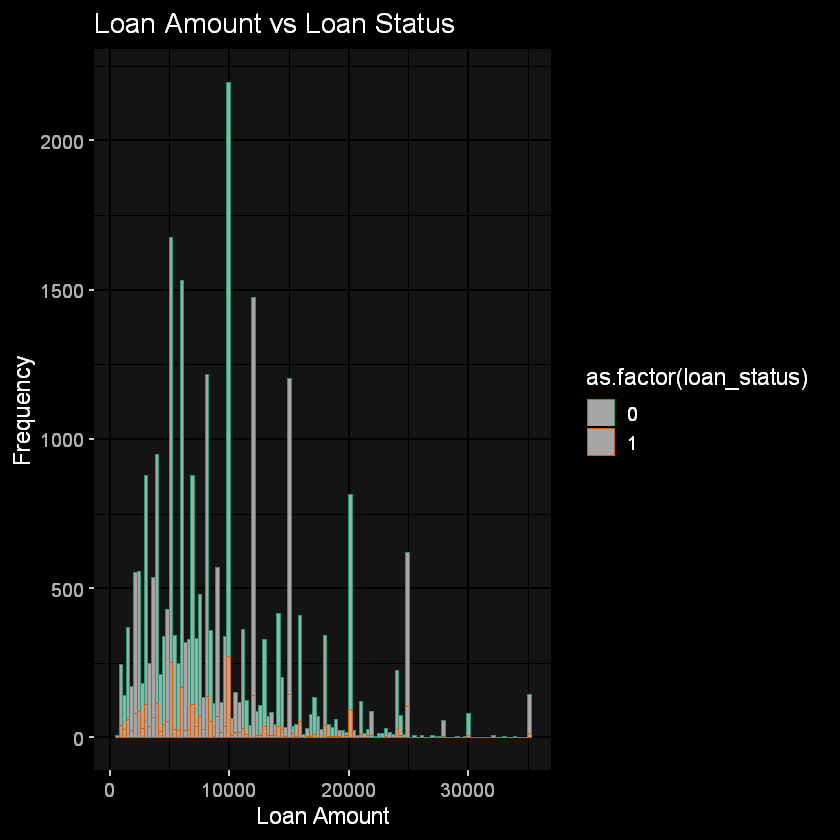

In [4]:
ggplot(loan_data, aes(x = loan_amnt, color = as.factor(loan_status))) + geom_histogram(position = 'identity', binwidth = 300) +
      scale_color_brewer(palette = 'Dark2') +
      dark_theme_gray(base_size = 14) + xlab('Loan Amount') + ylab('Frequency') + ggtitle('Loan Amount vs Loan Status')

As expected, the histogram is right skewed. Now lets look at our data. Here, we are trying to predict loan_status, we see that 90% of our response variable is 0 and only about 10% is 1. Loan defaults is a rare phenomenon indeed.

In [5]:
loan_data$loan_status <- factor(loan_data$loan_status)

CrossTable(loan_data$loan_status)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  29091 

 
          |         0 |         1 | 
          |-----------|-----------|
          |     25864 |      3227 | 
          |     0.889 |     0.111 | 
          |-----------|-----------|



 


There it is, the imbalance in data. We have non-default : default as 9 : 1, i.e., out of every 10 people that take a loan from the bank, only one defaults. This will prove to be a problem when we train our ML models and we will try to solve this by using a few techniques.

In [6]:
CrossTable(loan_data$home_ownership)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  29091 

 
          |  MORTGAGE |     OTHER |       OWN |      RENT | 
          |-----------|-----------|-----------|-----------|
          |     12001 |        97 |      2301 |     14692 | 
          |     0.413 |     0.003 |     0.079 |     0.505 | 
          |-----------|-----------|-----------|-----------|



 


Majority of our customers in the dataset either have a mortgage or are on rent, that is 42% and 50.5% respectively.

In [7]:
Cross_home_loan <- CrossTable(loan_data$home_ownership,loan_data$loan_status,
                    prop.r = TRUE,prop.c = FALSE,prop.t = FALSE,prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  29091 

 
                         | loan_data$loan_status 
loan_data$home_ownership |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                MORTGAGE |     10820 |      1181 |     12001 | 
                         |     0.902 |     0.098 |     0.413 | 
-------------------------|-----------|-----------|-----------|
                   OTHER |        80 |        17 |        97 | 
                         |     0.825 |     0.175 |     0.003 | 
-------------------------|-----------|-----------|-----------|
                     OWN |      2049 |       252 |      2301 | 
                         |     0.890 |     0.110 |     0.079 | 
-------------------------|-----------|-----------|-----------|
                    RENT |     12915 |      1777 |     14692 | 
           

Again, a lot of defaulters seem to either have a mortgage or are on rent.

In [8]:
Cross_grade_loan <- CrossTable(loan_data$grade,loan_data$loan_status,
                     prop.r = TRUE,prop.c = FALSE,prop.t = FALSE,prop.chisq = FALSE) 


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  29091 

 
                | loan_data$loan_status 
loan_data$grade |         0 |         1 | Row Total | 
----------------|-----------|-----------|-----------|
              A |      9084 |       565 |      9649 | 
                |     0.941 |     0.059 |     0.332 | 
----------------|-----------|-----------|-----------|
              B |      8344 |       985 |      9329 | 
                |     0.894 |     0.106 |     0.321 | 
----------------|-----------|-----------|-----------|
              C |      4903 |       844 |      5747 | 
                |     0.853 |     0.147 |     0.198 | 
----------------|-----------|-----------|-----------|
              D |      2651 |       580 |      3231 | 
                |     0.820 |     0.180 |     0.111 | 
----------------|-----------|-----------|-----------|
              E |  

**As the credit grade for the person falls, the chances of them defaulting increases by almost two fold.** Someone with a grade 'G' is almost twice as much likely to default on their loan than compared to someone with geade 'E'.

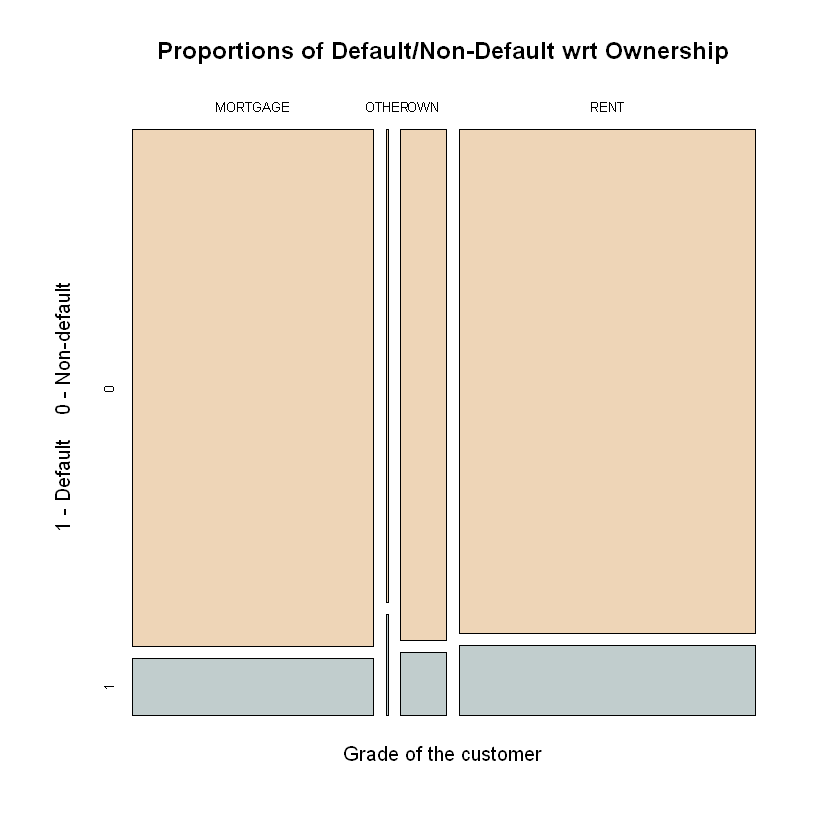

In [69]:
plot(Cross_home_loan$prop.tbl,col = c("bisque2","azure3"),main = "Proportions of Default/Non-Default wrt Ownership"
     ,xlab = "Grade of the customer",ylab = "1 - Default    0 - Non-default")

There’s not much to discuss here as there is no definitive pattern that we observe. Let’s see if we can find any association of loan defaults with grades.

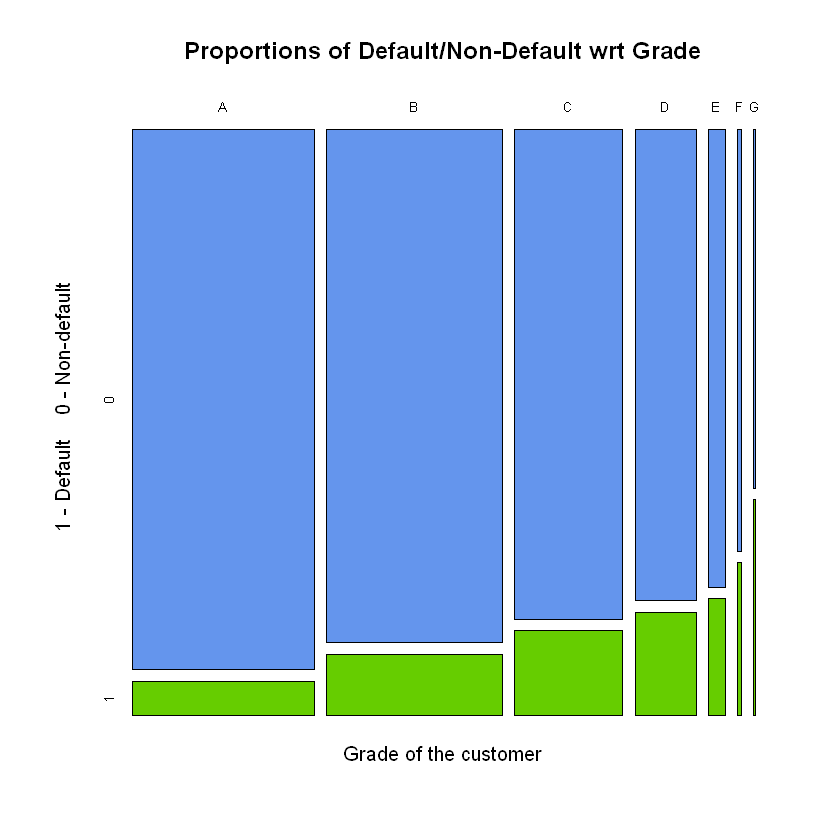

In [10]:
plot(Cross_grade_loan$prop.tbl,col = c("cornflowerblue","chartreuse3"),main = "Proportions of Default/Non-Default wrt Grade"
     ,xlab = "Grade of the customer",ylab = "1 - Default    0 - Non-default")

There definitely is a pattern here, the number of loan defaults indcrease as we move away from grade A. That is logical, as most bad customers(usually grade E,F,G) are more likely to default on their loans.

Let’s see if we have any missing data. Infact, we do. There are a lot of missing values in our employee length and interest rate variables. One way to get rid of this is that we put them in bins and then convert them into categorical variables.

In [11]:
summary(loan_data$emp_cat) # finding the number of missing data in employee category

0-15   15-30   30-45     45+ Missing 
  25642    2345     263      32     809

In [12]:
summary(loan_data$ir_cat) # finding the number of missing data in interest rate category 

0-8 11-13.5   13.5+    8-11 Missing 
   7130    6953    6002    6230    2776

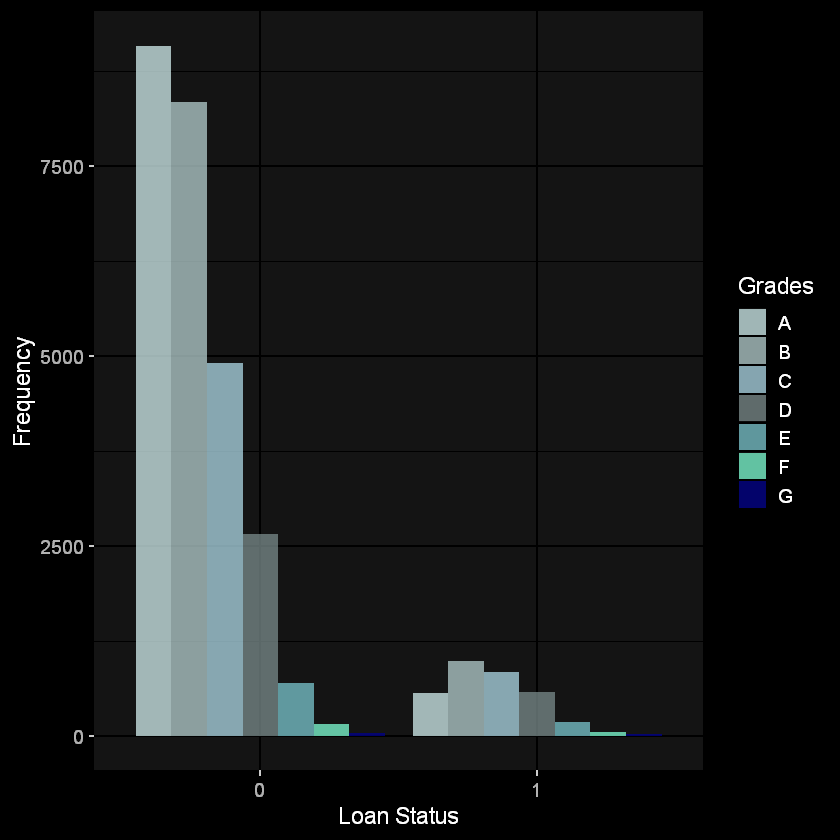

In [13]:
gg_status_loan <- ggplot(loan_data, aes(x = factor(loan_status), fill = grade))

val = c('lightcyan2', 'lightcyan3','lightblue','lightcyan4','cadetblue3','aquamarine','darkblue')
lab = c('A','B','C','D','E','F','G')
gg_status_loan + geom_bar(position = 'dodge', alpha = 0.75) + 
      scale_x_discrete('Loan Status') +
      scale_y_continuous('Frequency') +
      scale_fill_manual('Grades', values = val, labels = lab) +
      scale_color_brewer(palette = 'Dark2') +
      dark_theme_gray(base_size = 14)

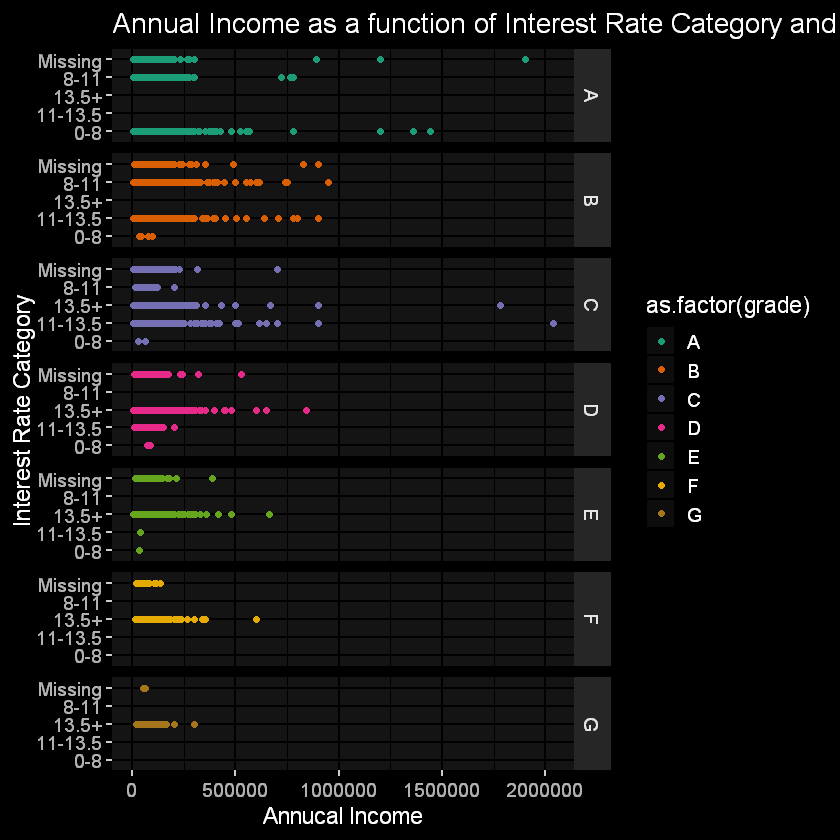

In [14]:
ggplot(loan_data,aes(x = annual_inc,y = ir_cat, color = as.factor(grade))) + geom_point() +
      facet_grid(grade ~ .) +
      scale_color_brewer(palette = 'Dark2') +
      dark_theme_gray(base_size = 14) + xlab('Annucal Income') + ylab('Interest Rate Category') +
      ggtitle('Annual Income as a function of Interest Rate Category and Grade')

The count of grades with respect to loan defaults gives us little insight, but distribution of annual income vs interest rates tells us that there are a lot of people with 13.5+ interest rate with good annual incomes.

To plot an income distribution across grades, we will need to scale down our annual income variable temporarily.

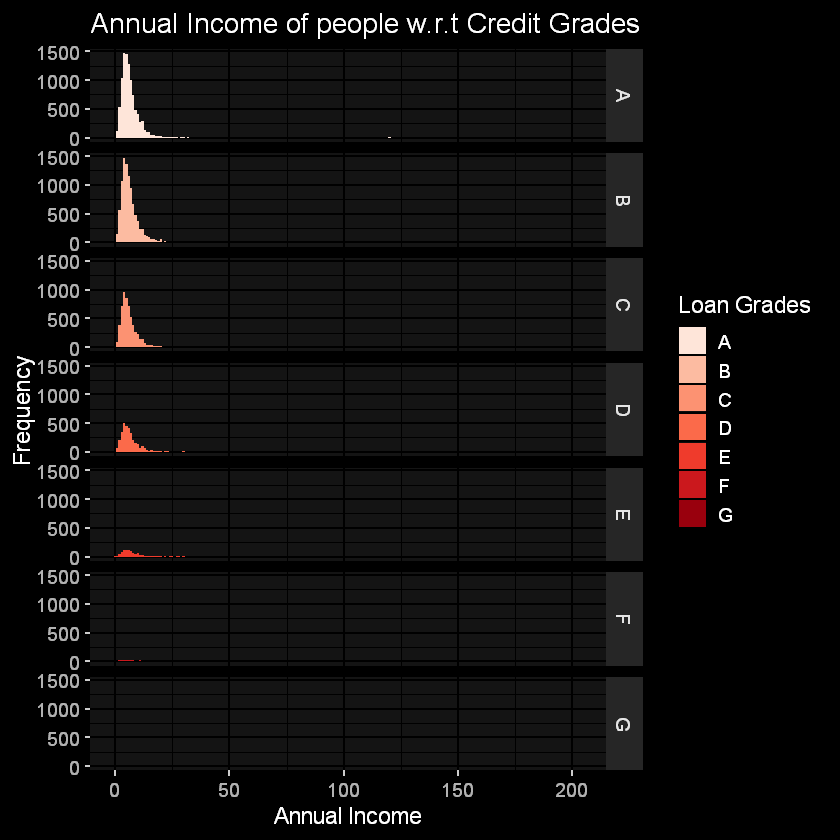

In [15]:
# scale down loan_data$annual_inc first

color <- scale_fill_brewer('Loan Grades', palette = 'Reds')

loan_new <- loan_data

loan_new$annual_inc <- loan_new$annual_inc/10000

ggplot(loan_new,aes(x = annual_inc,fill = factor(grade))) + 
      geom_histogram(binwidth = 1) + color + facet_grid(grade ~. ) +
      scale_color_brewer(palette = 'Dark2') +
      dark_theme_gray(base_size = 14) + xlab('Annual Income') + ylab('Frequency') +
      ggtitle('Annual Income of people w.r.t Credit Grades')

We see that customers with a higher grade have more annual income.

# LOGISTIC REGRESSION AND MODEL PERFORMANCE

In statistics, logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical.**Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution.**

Thus, it treats the same set of problems as probit regression using similar techniques with the latter using a cumulative normal distribution curve instead. Equivalently, in the latent variable interpretations of these two methods, the first assumes a standard logistic distribution of errors and the second a standard normal distribution of errors.

Logistic regression can be seen as a **special case of the generalized linear model** and thus analogous to linear regression. The model of logistic regression, however, is based on quite different assumptions (about the relationship between dependent and independent variables) from those of linear regression. In particular the key differences of these two models can be seen in the following two features of logistic regression.

First, the **conditional distribution, is a Bernoulli distribution rather than a Gaussian distribution, because the dependent variable is binary**. Second, the **predicted values are probabilities** and are therefore restricted to (0,1) through the logistic distribution function because **logistic regression predicts the probability of particular outcomes.**

In [16]:
# Logistic Regression
set.seed(123)

library(ROCR, warn.conflicts = FALSE)
library(pROC, warn.conflicts = FALSE)

index_train <- sample(1:nrow(loan_data), 2 / 3* nrow(loan_data)) # making a random sample of training set.

training_set <- loan_data[c(index_train), ] # storing the random sample in a training set.

testing_set <- loan_data[-index_train, ]

# Let's start playing around with logistic regression.


log_reg_small <- glm(loan_status ~ ir_cat + grade + loan_amnt + annual_inc,
                     family = "binomial", data = training_set)

summary(log_reg_small) # estimating the vaiable's of importance in our model. Loan amount is not significant.

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Type 'citation("pROC")' for a citation.



Call:
glm(formula = loan_status ~ ir_cat + grade + loan_amnt + annual_inc, 
    family = "binomial", data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0827  -0.5438  -0.4503  -0.3291   3.3431  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.535e+00  7.832e-02 -32.366  < 2e-16 ***
ir_cat11-13.5  7.139e-01  1.309e-01   5.453 4.95e-08 ***
ir_cat13.5+    6.929e-01  1.452e-01   4.771 1.83e-06 ***
ir_cat8-11     5.133e-01  1.165e-01   4.407 1.05e-05 ***
ir_catMissing  5.276e-01  1.280e-01   4.120 3.79e-05 ***
gradeB         2.230e-01  1.040e-01   2.144   0.0320 *  
gradeC         4.945e-01  1.192e-01   4.150 3.33e-05 ***
gradeD         7.783e-01  1.353e-01   5.755 8.69e-09 ***
gradeE         1.019e+00  1.612e-01   6.323 2.56e-10 ***
gradeF         1.351e+00  2.283e-01   5.917 3.29e-09 ***
gradeG         1.844e+00  3.589e-01   5.137 2.80e-07 ***
loan_amnt     -7.496e-06  4.181e-06  -1.793   0.0729 .  
annual_

Looking at the summary of our model, we can say that **interest rates, annual income and grades** are all very important in our model. **Loan amount is not a very significant variable in our model.**

Time to make some predictions with our model and test it on various parameters.

In [17]:
predictions_small <- predict(log_reg_small, newdata = testing_set,
                              type = "response")                

range(predictions_small) # getting the range of the probabilities calculated above.

[1] 5.294782e-06 4.572050e-01

Looks like the range is not a lot, with mahority of the cases falling in somewhere in the middle. See, this is the prpblem we face with imbalanced data. How do we decide the cut-off or threshold value? We can only experiment. Let's try with 0.15.

In [18]:
pred_cutoff_15_small <- ifelse(predictions_small > 0.15,1,0)

conf_15_small <- table(testing_set$loan_status, pred_cutoff_15_small)
conf_15_small # 

   pred_cutoff_15_small
       0    1
  0 6703 1959
  1  629  406

Now that we have the predictions on the testing set with it's original labels, we can find the accuracy of our model.

In [19]:
accuracy_15_small <- sum(diag(conf_15_small))/sum(conf_15_small)

paste('Accuracy of the LR model with threshold at 0.15 is :', paste(accuracy_15_small * 100, '%', sep = ''))

[1] "Accuracy of the LR model with threshold at 0.15 is : 73.3113334020831%"

In [20]:
pred_cutoff_20_small <- ifelse(predictions_small > 0.20,1,0)

conf_20_small <- table(testing_set$loan_status, pred_cutoff_20_small)
conf_20_small

   pred_cutoff_20_small
       0    1
  0 8143  519
  1  904  131

In [21]:
accuracy_20_small <- sum(diag(conf_20_small))/sum(conf_20_small)

paste('Accuracy of the LR model with threshold at 0.20 is :', paste(accuracy_20_small * 100, '%', sep = ''))

[1] "Accuracy of the LR model with threshold at 0.20 is : 85.3253583582551%"

**85%? Not bad! But is classification accuracy the correct measure here to evaluate performance?** 

We see that depending on the cutoff value of 0.15 and 0.20, we get accuracies of 73% and 85% respectively. Now let us plot the ROC Curve and calculate the AUC(Area under the curve) for our model.

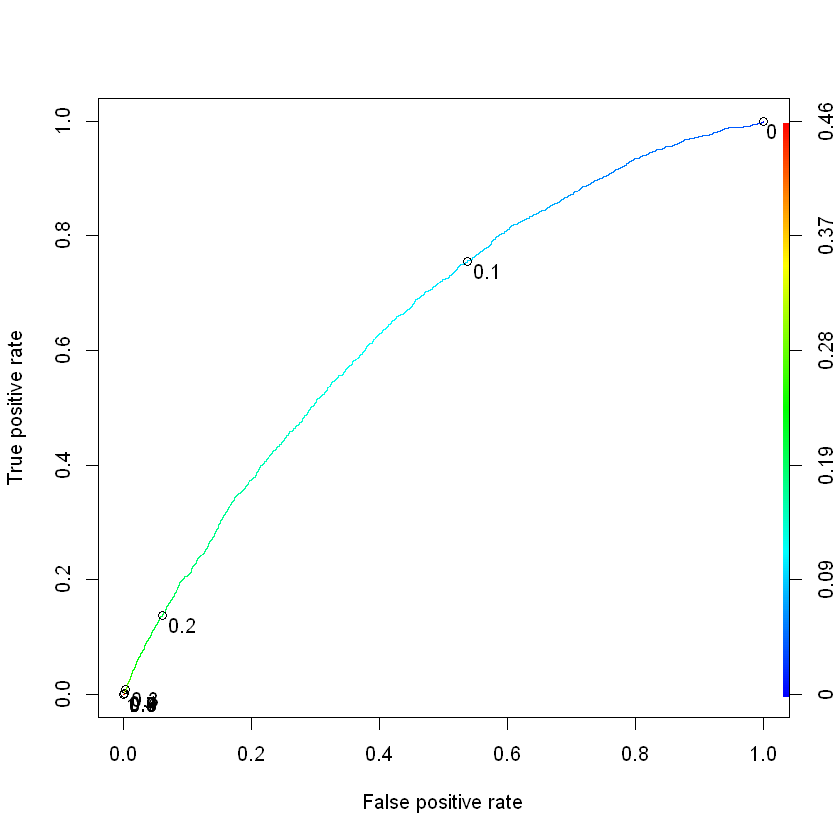

In [22]:
pred_train_small <- predict(log_reg_small,type = "response")

predROC_small <- prediction(pred_train_small, training_set$loan_status)

perfROC_small <- performance(predROC_small,"tpr","fpr")

plot(perfROC_small, colorize = TRUE,
     print.cutoffs.at = seq(0,1,0.1),text.adj = c(-0.2,1.7))

In [23]:
AUC_small <- as.numeric(performance(predROC_small , "auc")@y.values)

paste('Area under the curve is :', AUC_small)

[1] "Area under the curve is : 0.655950929148463"

We see that the we get an AUC of 0.6559. That’s a pretty decent AUC considering that we used only 4 predcitors in our Logistic model. Can we increase the accuracy by using all the variables? Let’s find out.

In [24]:
log_reg_full <- glm(loan_status ~., family = "binomial", data = training_set)

summary(log_reg_full)


Call:
glm(formula = loan_status ~ ., family = "binomial", data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1907  -0.5420  -0.4461  -0.3228   3.3283  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.305e+00  1.365e-01 -16.887  < 2e-16 ***
loan_amnt           -7.495e-06  4.183e-06  -1.792   0.0732 .  
gradeB               2.240e-01  1.043e-01   2.147   0.0318 *  
gradeC               5.072e-01  1.195e-01   4.245 2.19e-05 ***
gradeD               8.025e-01  1.356e-01   5.918 3.26e-09 ***
gradeE               1.048e+00  1.616e-01   6.488 8.72e-11 ***
gradeF               1.372e+00  2.288e-01   5.997 2.01e-09 ***
gradeG               1.868e+00  3.591e-01   5.202 1.97e-07 ***
home_ownershipOTHER  6.757e-01  3.209e-01   2.106   0.0352 *  
home_ownershipOWN   -5.076e-02  9.078e-02  -0.559   0.5761    
home_ownershipRENT  -6.289e-02  5.220e-02  -1.205   0.2283    
annual_inc          -5.091e-06  7.6

In [25]:
predictions_full <- predict(log_reg_full, newdata = testing_set, type = "response")

range(predictions_full)

[1] 6.305072e-06 4.997441e-01

In [26]:
pred_cutoff_15 <- ifelse(predictions_full > 0.15,1,0)

confmat_15_full <- table(testing_set$loan_status,pred_cutoff_15)
confmat_15_full # 0.392 Sensitivity

   pred_cutoff_15
       0    1
  0 6724 1938
  1  629  406

In [27]:
accuracy_15 <- sum(diag(confmat_15_full))/sum(confmat_15_full)

paste('Accuracy of the full LR model with threshold at 0.15 is :', paste(accuracy_15 * 100, '%', sep = ''))

[1] "Accuracy of the full LR model with threshold at 0.15 is : 73.5278952253274%"

In [28]:
pred_cutoff_20 <- ifelse(predictions_full > 0.20,1,0)

confmat_20_full <- table(testing_set$loan_status,pred_cutoff_20)
confmat_20_full

   pred_cutoff_20
       0    1
  0 8092  570
  1  882  153

In [29]:
accuracy_20 <- sum(diag(confmat_20_full))/sum(confmat_20_full)

paste('Accuracy of the full LR model with threshold at 0.20 is :', paste(accuracy_20 * 100, '%', sep = ''))

[1] "Accuracy of the full LR model with threshold at 0.20 is : 85.0262967928225%"

Even with all the predictor variables we are not able to increase the accuracy in our model. But what we have successfully done here is that we have increased the model complexity and made it even harder to interpret. We should stick to our first model with 4 predictor variables as it is much easy to interpret and gives more or less the same result.

Let’s now see how the model performs with the ROC Curve.

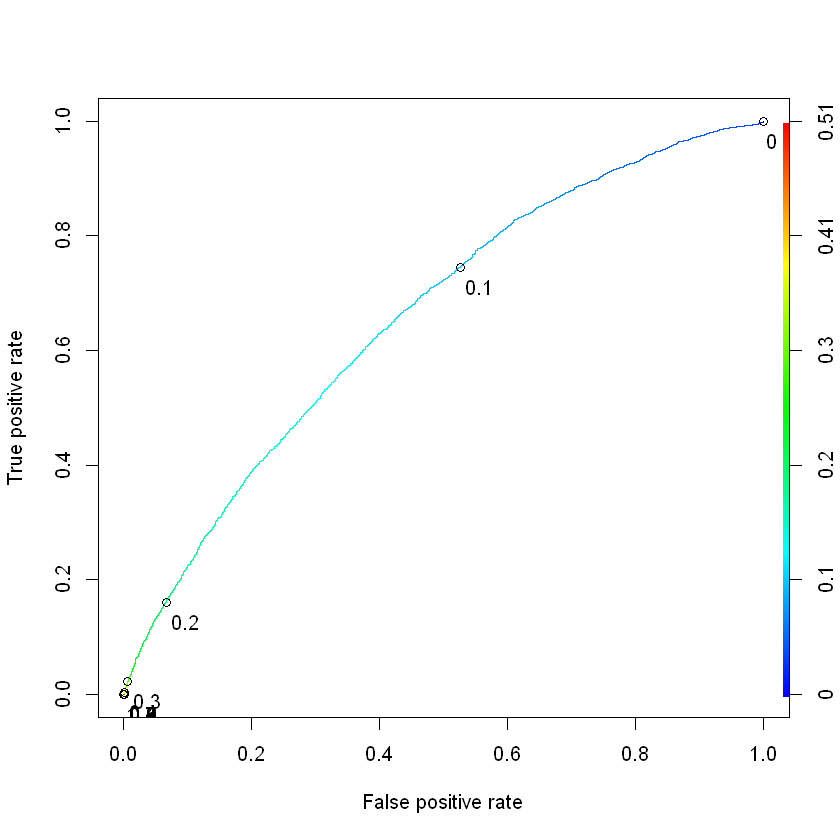

In [30]:
pred_train_full <- predict(log_reg_full,type = "response")

predROC_full <- prediction(pred_train_full, training_set$loan_status)

perfROC_full <- performance(predROC_full,"tpr","fpr")

plot(perfROC_full, colorize = TRUE,
     print.cutoffs.at = seq(0,1,0.1),text.adj = c(-0.2,1.7))

In [31]:
AUC_full <- as.numeric(performance(predROC_full , "auc")@y.values)

paste('Area under the curve for the full model is :', AUC_full)

[1] "Area under the curve for the full model is : 0.660465262696488"

The AUC for this model comes out to be 0.660465 which is **not a significant gain from our previous model**. Let’s move onto CART(Classification and Regression Trees) to see if we can make better predicions on this highly unbalanced data with Decision Trees and the various techniques that come with it.

So far, we think we have done a great job at classifying loan defaults. **Let's think for a minute. If there are 100 samples and if one class has a 90% representation in the data and the other has only 10%, if we classify every sample as the majority class, then doesn't our accuracy become 90%?**

This is the problem with imbalanced data. So, how do we make ammends, I hear you ask? 

# STATISTICAL MEASURES WE NEED TO TALK ABOUT

**Sensitivity** and **Specificity** are statistical measures of the performance of a binary classification test, also known in statistics as classification function.

**Sensitivity:** (also called the true positive rate, or the recall) **measures the proportion of positives that are correctly identified as such** (e.g., the percentage of sick people who are correctly identified as having the condition).

**Specificity:** (also called the true negative rate) **measures the proportion of negatives that are correctly identified as such** (e.g., the percentage of healthy people who are correctly identified as not having the condition).

# CLASSIFICATION AND REGRESSION TREES

What is CART?

Decision tree learning uses a decision tree as a predictive model which maps observations about an item to conclusions about the item’s target value. It is one of the predictive modelling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a finite set of values are called classification trees.

In these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision tree learning is a method commonly used in data mining. The goal is to create a model that predicts the value of a target variable based on several input variables.

We should not make the same mistake that we made during building Logistic Regression model of training and predicting on an imbalanced dataset, which will give us a poor classifier.

## PRIOR PROBABILITIES

In this technique, we will **explicitly define the probabilities of defaults and non-defaults**, such that the CART model knows when to classify the observation as a default.

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


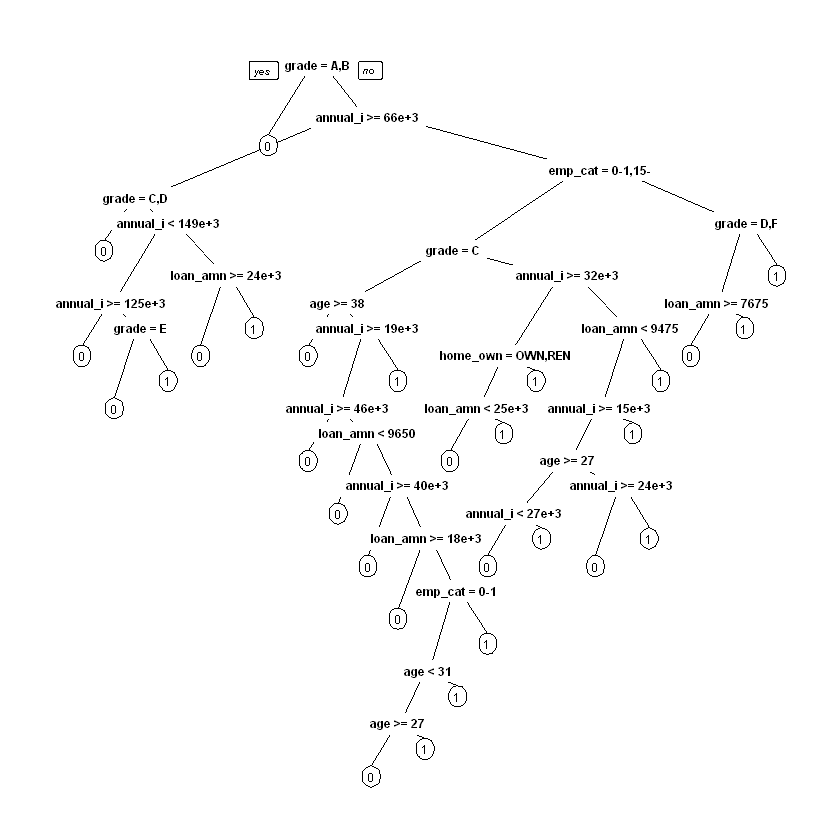

In [32]:
# Decision Trees

library(rpart, warn.conflicts = FALSE) # making decision trees.
library(rpart.plot, warn.conflicts = FALSE) # for plotcp and princp functions.
library(rattle, warn.conflicts = FALSE)
library(RColorBrewer, warn.conflicts = FALSE) # for great decision tree plots
 
# Changing the prior probabilities of loan default and non-loan default

tree_prior <- rpart(loan_status ~., method = 'class',
                    data = training_set,
                    parms = list(prior = c(0.7,0.3)), # changing the probabilities of non loan default to 0.7
                    control = rpart.control(cp = 0.001)) # and loan default to 0.3

prp(tree_prior)

There it is, we have a Decision Tree rules. The **complexity parameter** (cp) is used to **control the size of the decision tree and to select the optimal tree size**. If the cost of adding another variable to the decision tree from the current node is above the value of cp, then tree building does not continue.

Below, we print out all the values of the complexity parameter and errors to find the best value for hyperparameter cp.

In [33]:
printcp(tree_prior) # cp and xerror values


Classification tree:
rpart(formula = loan_status ~ ., data = training_set, method = "class", 
    parms = list(prior = c(0.7, 0.3)), control = rpart.control(cp = 0.001))

Variables actually used in tree construction:
[1] age            annual_inc     emp_cat        grade          home_ownership
[6] loan_amnt     

Root node error: 5818.2/19394 = 0.3

n= 19394 

          CP nsplit rel error  xerror     xstd
1  0.0029135      0   1.00000 1.00000 0.020116
2  0.0019726      6   0.97239 0.99144 0.019353
3  0.0016211      7   0.97042 0.99340 0.019286
4  0.0016155      9   0.96718 0.99603 0.019251
5  0.0015170     10   0.96556 0.99399 0.019249
6  0.0014976     14   0.95901 0.99481 0.019250
7  0.0012573     19   0.95020 0.99526 0.019254
8  0.0012393     20   0.94894 0.99644 0.019209
9  0.0011956     24   0.94398 0.99698 0.019210
10 0.0010359     26   0.94159 0.99931 0.019192
11 0.0010000     28   0.93952 1.00143 0.019190


This is proving a little difficult to comprehend, let's make a plot and maybe that'll help us figure out the best value for cp better.

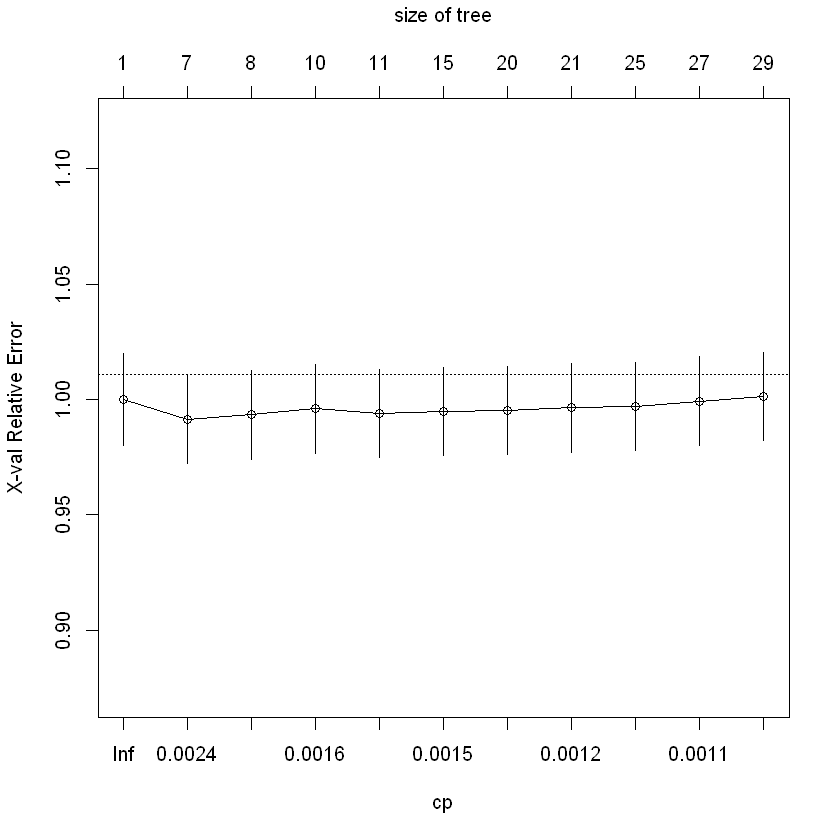

In [34]:
plotcp(tree_prior) # cp vs xerror plot

Hmm. Still not that obvious, but we do seem to have an inkling of what could be the best value for cp. We must isolate the optimal value, and that's exactly what we will do.

In [35]:
tree_min <- tree_prior$cptable[which.min(tree_prior$cptable[,"xerror"]),"CP"]

tree_min

[1] 0.001972642

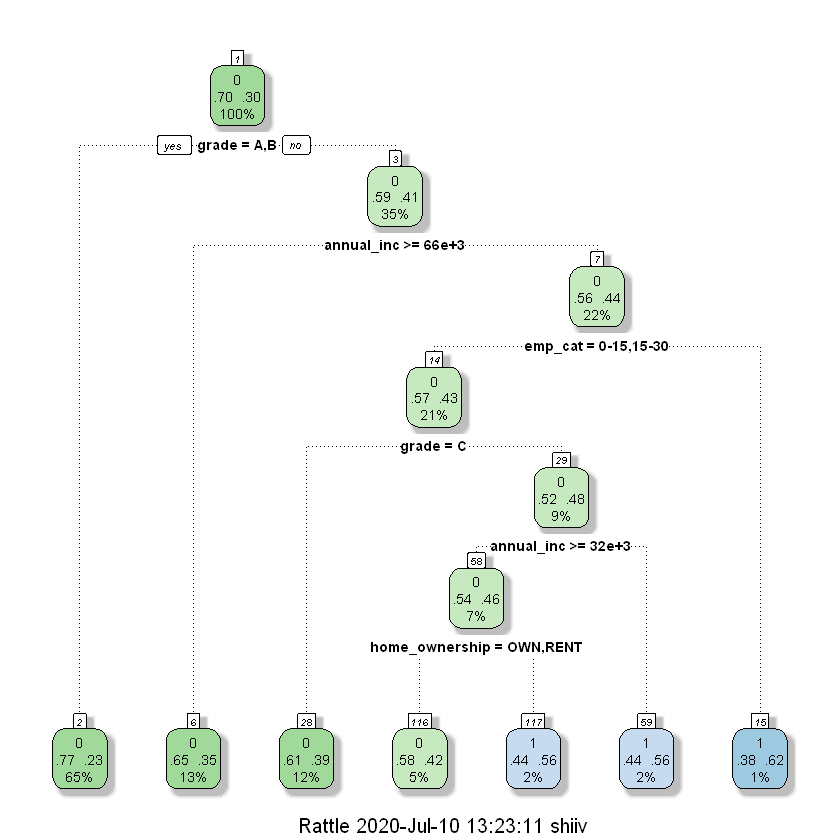

In [36]:
# pruning the tree for increased model performance.

ptree_prior <- prune(tree_prior, cp = tree_min) # pruning the tree.

fancyRpartPlot(ptree_prior)

pred_prior <- predict(ptree_prior, newdata = testing_set, type = "class") # making predictions

In [37]:
confmat_prior <- table(testing_set$loan_status, pred_prior) # making the confusion matrix.

confmat_prior # 0.098 Sensitivity

   pred_prior
       0    1
  0 8332  330
  1  933  102

Before we can go and check the accuracy, it's better to have a look at the ROC for our Decision Tree with prior probabilities. We will use the predict method again, but this time with probabilities, before we can pass it to the auc and roc function of the package pROC.

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testing_set$loan_status, predictor = pred_prior_probs[,     2])

Data: pred_prior_probs[, 2] in 8662 controls (testing_set$loan_status 0) < 1035 cases (testing_set$loan_status 1).
Area under the curve: 0.6057


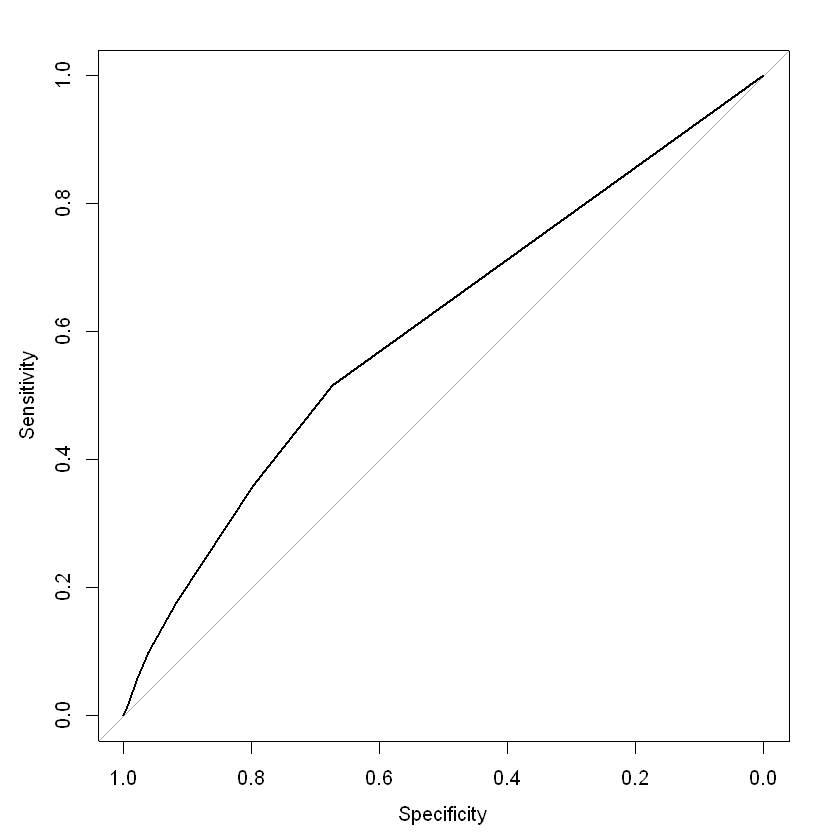

In [38]:
pred_prior_probs <- predict(ptree_prior, newdata = testing_set, type = 'prob')

auc_loss_matrix <- auc(testing_set$loan_status, pred_prior_probs[, 2])

plot(roc(testing_set$loan_status, pred_prior_probs[, 2]))

print(roc(testing_set$loan_status, pred_prior_probs[, 2]))

In [39]:
acc_prior <- sum(diag(confmat_prior)) / sum(confmat_prior)

paste('Accuracy of the Decision Tree with prior probabilities is :', paste(acc_prior * 100, '%', sep = ''))

[1] "Accuracy of the Decision Tree with prior probabilities is : 86.9753532020212%"

We see a brilliant 87% accuracy with this model, not only is this an increase of 3% from our Logistic Regression model, it is also a more accurate classifier considering the imbalanced class representation.

## LOSS MATRIX

In this technique, we will penalize our model every time it classifies a default as a non-default or a non-default as a default. This is a very strict model and most of the times we won’t get desired results. But let's give it a shot nevertheless.

In [40]:
# Including a loss matrix

tree_loss_matrix <- rpart(loan_status ~., method = "class",
                          data = training_set,
                          parms = list(loss = matrix(c(0,10,1,0), ncol = 2)), # penalizing classifying a default 
                          control = rpart.control(cp = 0.001))  # as a non default 10 times more.

printcp(tree_loss_matrix)


Classification tree:
rpart(formula = loan_status ~ ., data = training_set, method = "class", 
    parms = list(loss = matrix(c(0, 10, 1, 0), ncol = 2)), control = rpart.control(cp = 0.001))

Variables actually used in tree construction:
[1] age            annual_inc     emp_cat        grade          home_ownership
[6] ir_cat         loan_amnt     

Root node error: 17202/19394 = 0.88698

n= 19394 

          CP nsplit rel error  xerror     xstd
1  0.1314963      0   1.00000 10.0000 0.025633
2  0.0051738      1   0.86850  6.5096 0.039847
3  0.0050285      2   0.86333  6.5558 0.039791
4  0.0046312      4   0.85327  6.4853 0.039869
5  0.0024997      7   0.83938  5.8622 0.040261
6  0.0024706      8   0.83688  5.9880 0.040224
7  0.0020540     15   0.81874  5.9124 0.040251
8  0.0018602     18   0.81258  5.8952 0.040256
9  0.0018021     21   0.80700  5.7612 0.040279
10 0.0015115     22   0.80520  5.6579 0.040276
11 0.0014533     23   0.80369  5.6527 0.040276
12 0.0012595     24   0.80223  5.

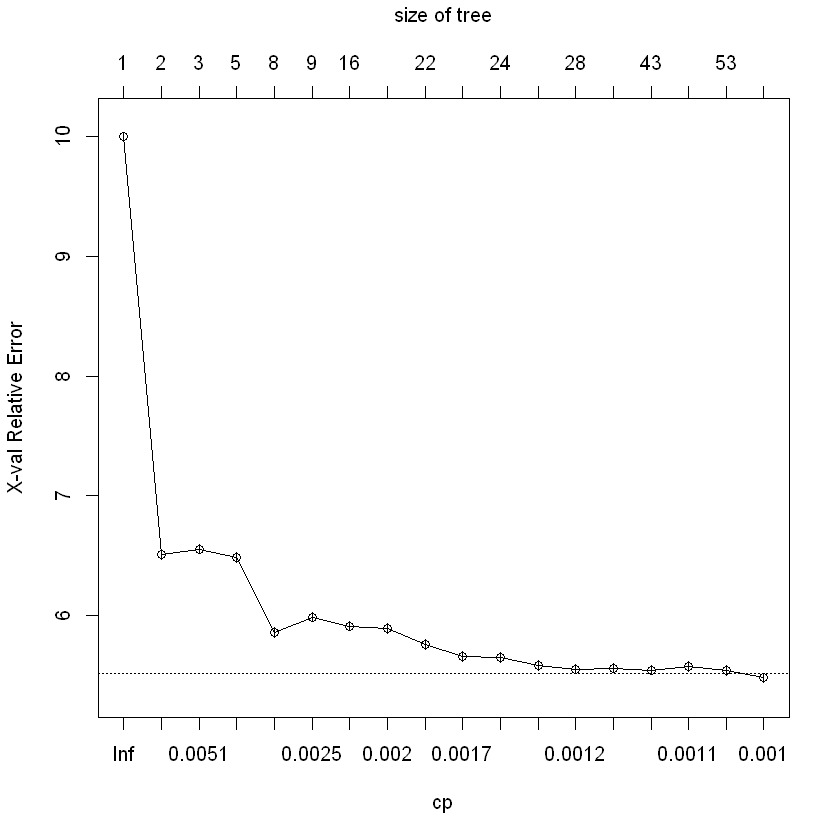

In [41]:
plotcp(tree_loss_matrix)

In [42]:
tree_min_loss <- tree_loss_matrix$cptable[which.min(tree_loss_matrix$cptable[,"xerror"]),"CP"]

In [43]:
tree_min_loss

[1] 0.001

In [44]:
paste('The best complexity parameter for our Decision Tree with a Loss Matrix will be : ', tree_min_loss)

[1] "The best complexity parameter for our Decision Tree with a Loss Matrix will be :  0.001"

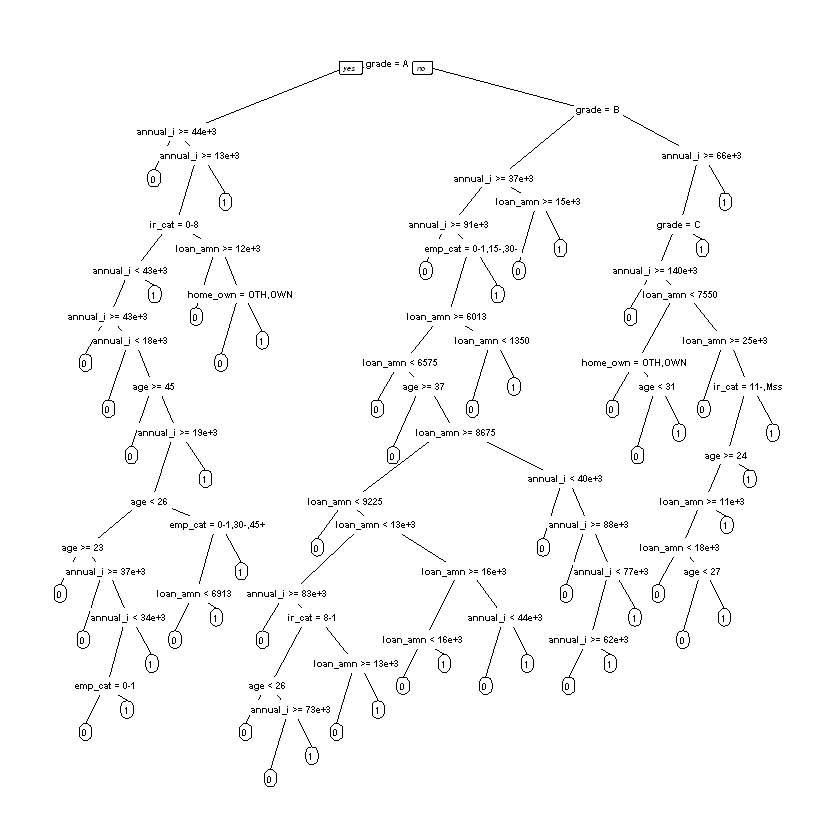

In [45]:
ptree_loss_matrix <- prune(tree_loss_matrix, cp = tree_min_loss)

prp(tree_loss_matrix)

We see a huge tree which is **very hard to interpret, is oversized and is definitely suffering from Overfitting. Overfitting is a huge problem in Machine Learning as it generalizes all too well on the training set and hence fails to do well on the test set or unseen observations.** I hope we can do something about it in the next model.

In [46]:
pred_loss_matrix <- predict(ptree_loss_matrix, newdata = testing_set, type = "class")

confmat_loss_matrix <- table(testing_set$loan_status, pred_loss_matrix)

confmat_loss_matrix # 0.7584 Sensitivity 

   pred_loss_matrix
       0    1
  0 3866 4796
  1  250  785

Looks like the accuracy of this model is going to be really bad! But **look at the number of cases where it has classified a default as a default!** Bravo! The algorithm does really well in catching the defaulters, however, if you look closely, it also classifies as lot of non-defaulters as defaulters, hence this is not the best model for us.

Before we can go and check the accuracy, it's better to have a look at the ROC for our Decision Tree with loss matrix. We will use the predict method again, but this time with probabilities, before we can pass it to the auc and roc function of the package pROC.

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testing_set$loan_status, predictor = pred_loss_probs[,     2])

Data: pred_loss_probs[, 2] in 8662 controls (testing_set$loan_status 0) < 1035 cases (testing_set$loan_status 1).
Area under the curve: 0.6265


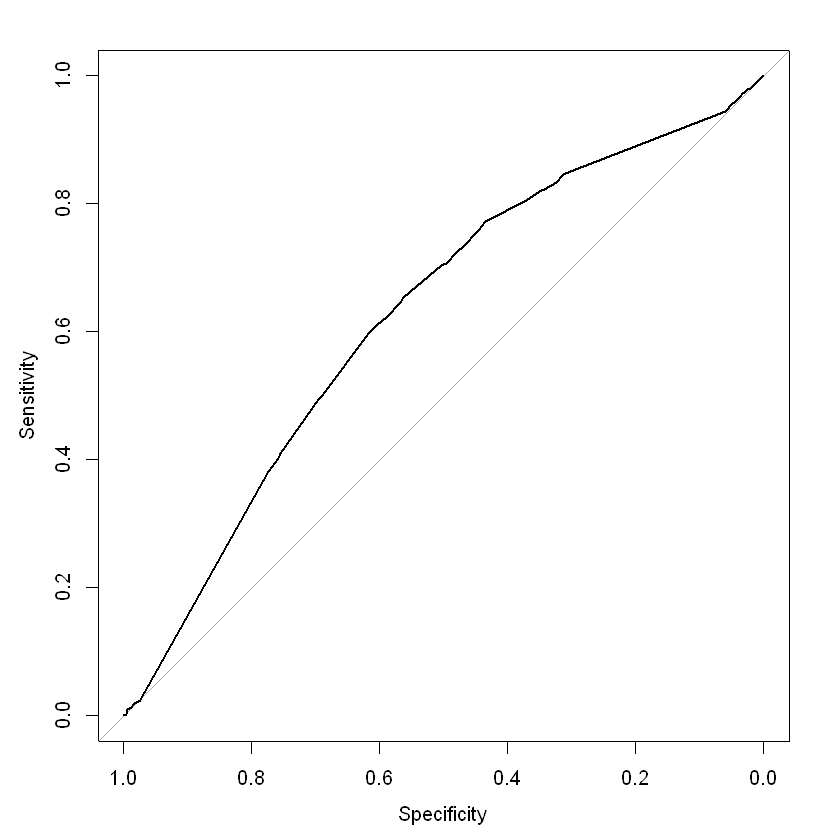

In [47]:
pred_loss_probs <- predict(ptree_loss_matrix, newdata = testing_set, type = 'prob')

auc_loss_matrix <- auc(testing_set$loan_status, pred_loss_probs[, 2])

plot(roc(testing_set$loan_status, pred_loss_probs[, 2]))

print(roc(testing_set$loan_status, pred_loss_probs[, 2]))

In [48]:
acc_loss_matrix <- sum(diag(confmat_loss_matrix)) / sum(confmat_loss_matrix)

paste('Accuracy of the Decision Tree with loss matrix is :', paste(acc_loss_matrix * 100, '%', sep = ''))

[1] "Accuracy of the Decision Tree with loss matrix is : 47.9632876147262%"

Terrible, just terrible! The Decision Tree does even worse than a 50/50 guessing algorithm. Maybe we have penalized our model a bit too much.

# WEIGHTED MATRIX

In this technique, we weight the important default cases and tell our algorithm to refer to them when classifying.

Here, **cp, minsplit anf minbucket** are all hyperparameters. We will follow the the similar approach, the only difference would be that we have something called **class weights** now. Class weights are weights that are initialized to 1 if the sample belongs to a **non-default** case where as it is initialized with a 3 if the sample belongs to a **default** case. Hence, artificially giving weights to the model, which is being fed in via the **weights** paramter which comes built-in in rpart.

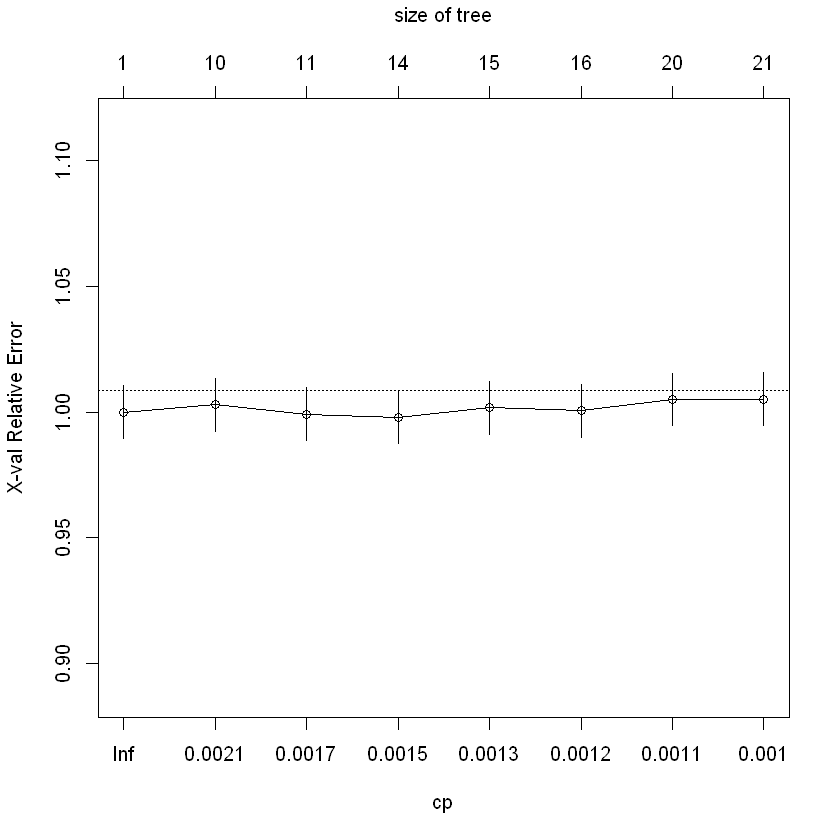

In [49]:
# including case weights for the training set

case_weights <- ifelse(training_set$loan_status == 0,1,3)

tree_weights <- rpart(loan_status ~ ., method = "class", 
                      data = training_set, 
                      control = rpart.control(cp = 0.001, minsplit = 5, minbucket = 2),
                      weights = case_weights)

plotcp(tree_weights)

In [50]:
tree_min_weighing <- tree_weights$cptable[which.min(tree_weights$cptable[,"xerror"]),"CP"]

tree_min_weighing

[1] 0.001368613

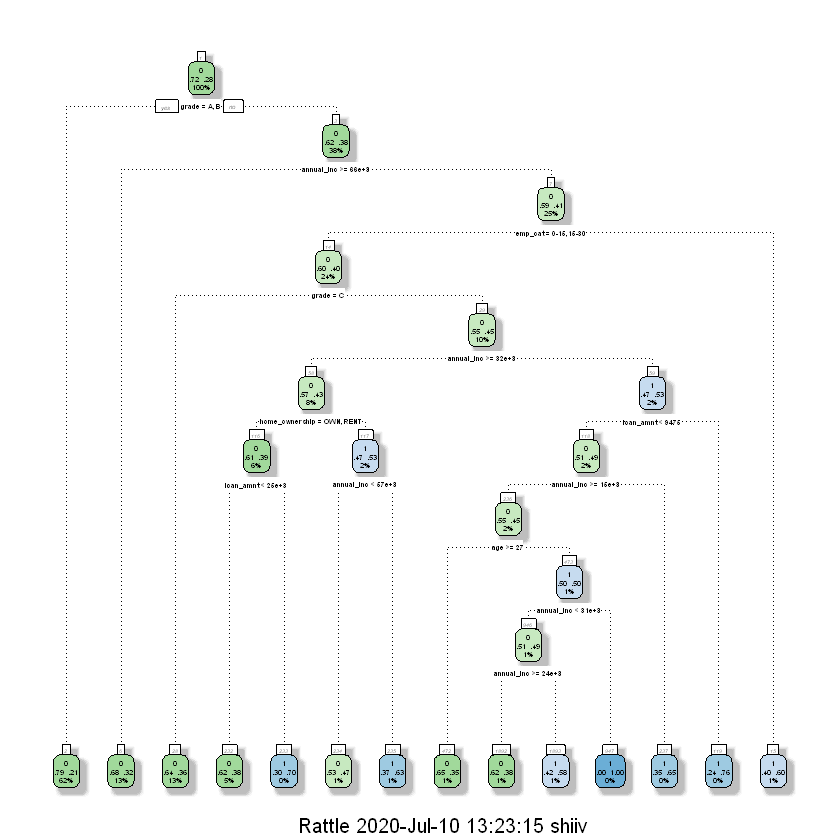

In [51]:
ptree_weights <- prune(tree_weights, cp = tree_min_weighing)

fancyRpartPlot(ptree_weights)

In [52]:
pred_weights <- predict(ptree_weights, newdata = testing_set, type = 'class')

confmat_weights <- table(testing_set$loan_status, pred_weights)
confmat_weights # 0.0444 Sensitivity

   pred_weights
       0    1
  0 8488  174
  1  980   55

This model seems to be doing great in classifying the non-defaulters and does okayish on the catching the defaulters.

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testing_set$loan_status, predictor = pred_weights_probs[,     2])

Data: pred_weights_probs[, 2] in 8662 controls (testing_set$loan_status 0) < 1035 cases (testing_set$loan_status 1).
Area under the curve: 0.605


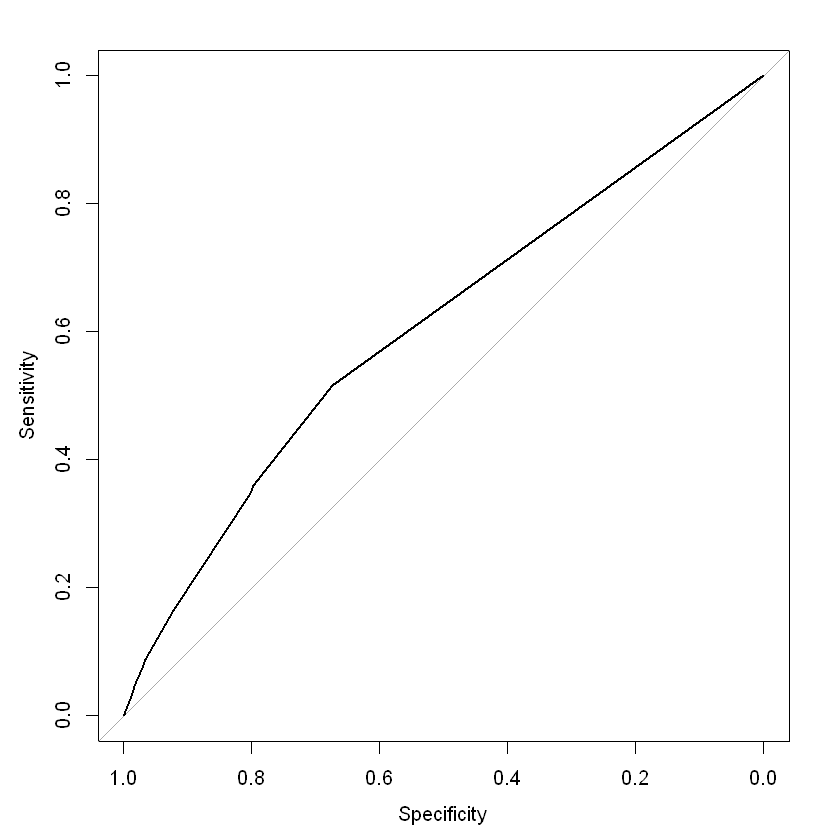

In [53]:
pred_weights_probs <- predict(ptree_weights, newdata = testing_set, type = 'prob')

auc_weights <- auc(testing_set$loan_status, pred_weights_probs[, 2])

plot(roc(testing_set$loan_status, pred_weights_probs[, 2]))

print(roc(testing_set$loan_status, pred_weights_probs[, 2]))

In [54]:
acc_weights <- sum(diag(confmat_weights)) / sum(confmat_weights)

paste('Accuracy of the Decision Tree with weighted matrix is :', paste(acc_weights * 100, '%', sep = ''))

[1] "Accuracy of the Decision Tree with weighted matrix is : 88.0994121893369%"

Accuracy is great, but not the only metric that we should be taking into account while dealing with such disproportionate datasets. 

# UNDERSAMPLING

This is the last trick we have up our sleeves, let's see how it performs on our data. For simplicity, I have done the sampling in another notebook and saved it in the file `undersampled_training_set.xlsx`. In this, I have sampled the data in such a way that it has 1/3 of the data representing defaults and the rest, 2/3 of it as non-defaults.

In [55]:
undersampled_training_set <- read_excel('undersampled_training_set.xlsx')

In [56]:
summary(undersampled_training_set)

str(undersampled_training_set)

  loan_status       loan_amnt        grade           home_ownership    
 Min.   :0.0000   Min.   : 1000   Length:6570        Length:6570       
 1st Qu.:0.0000   1st Qu.: 5000   Class :character   Class :character  
 Median :0.0000   Median : 8000   Mode  :character   Mode  :character  
 Mean   :0.3333   Mean   : 9494                                        
 3rd Qu.:1.0000   3rd Qu.:12000                                        
 Max.   :1.0000   Max.   :35000                                        
   annual_inc          age          emp_cat             ir_cat         
 Min.   :  4080   Min.   :20.00   Length:6570        Length:6570       
 1st Qu.: 38000   1st Qu.:23.00   Class :character   Class :character  
 Median : 55000   Median :26.00   Mode  :character   Mode  :character  
 Mean   : 64800   Mean   :27.62                                        
 3rd Qu.: 79150   3rd Qu.:30.00                                        
 Max.   :900000   Max.   :78.00                                 

Classes 'tbl_df', 'tbl' and 'data.frame':	6570 obs. of  8 variables:
 $ loan_status   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ loan_amnt     : num  15000 6600 2200 24250 2500 ...
 $ grade         : chr  "E" "D" "A" "D" ...
 $ home_ownership: chr  "RENT" "RENT" "MORTGAGE" "RENT" ...
 $ annual_inc    : num  62000 30000 45000 136000 18984 ...
 $ age           : num  21 29 31 31 22 45 36 28 27 37 ...
 $ emp_cat       : chr  "0-15" "0-15" "0-15" "0-15" ...
 $ ir_cat        : chr  "13.5+" "13.5+" "0-8" "13.5+" ...


Very similar to our loan dataset, let's see the distribution of classes after undersampling the non-defaulters.

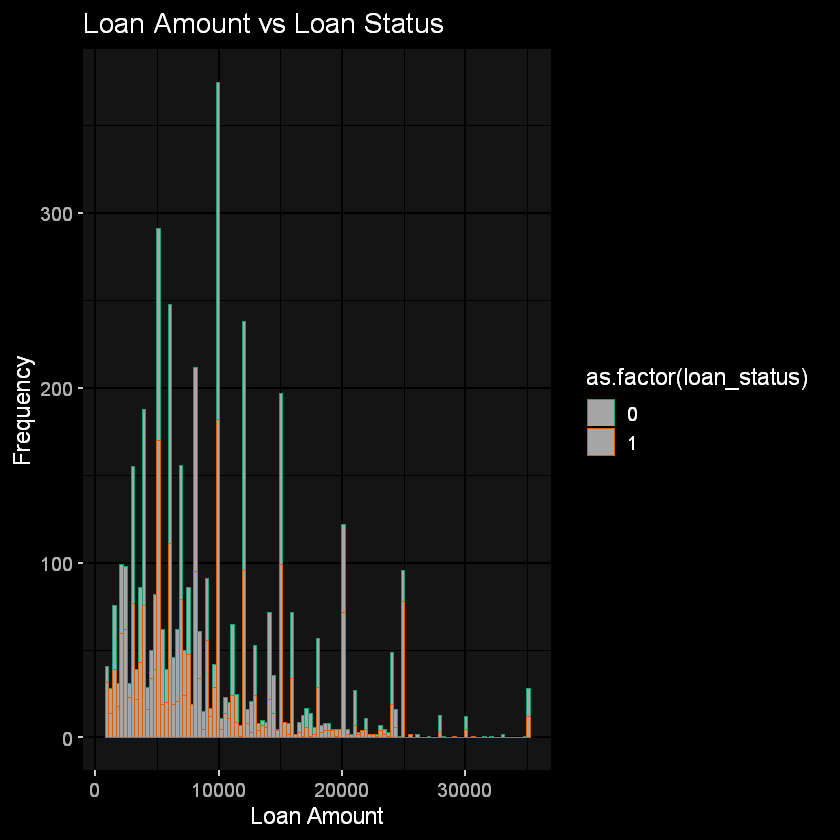

In [57]:
ggplot(undersampled_training_set, aes(x = loan_amnt, color = as.factor(loan_status))) + geom_histogram(position = 'identity', binwidth = 300) +
      scale_color_brewer(palette = 'Dark2') +
      dark_theme_gray(base_size = 14) + xlab('Loan Amount') + ylab('Frequency') + ggtitle('Loan Amount vs Loan Status')

Clearly, the non-defaulters seem to have been undersampled, as evident from the distribution above.

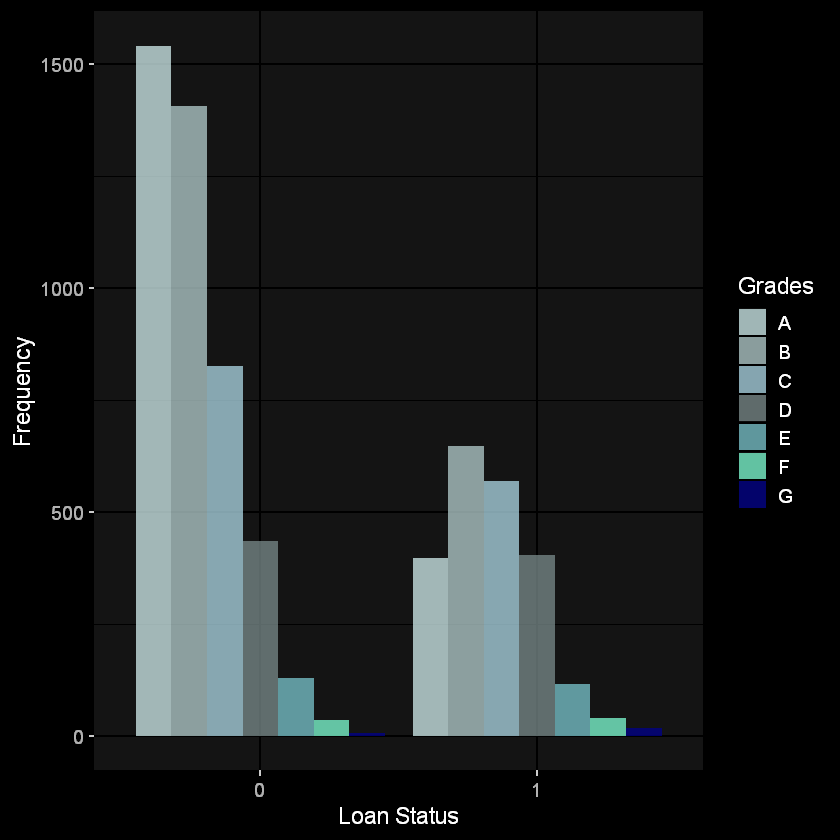

In [58]:
gg_status_loan <- ggplot(undersampled_training_set, aes(x = factor(loan_status), fill = grade))

val = c('lightcyan2', 'lightcyan3','lightblue','lightcyan4','cadetblue3','aquamarine','darkblue')
lab = c('A','B','C','D','E','F','G')
gg_status_loan + geom_bar(position = 'dodge', alpha = 0.75) + 
      scale_x_discrete('Loan Status') +
      scale_y_continuous('Frequency') +
      scale_fill_manual('Grades', values = val, labels = lab) +
      scale_color_brewer(palette = 'Dark2') +
      dark_theme_gray(base_size = 14)

Again, just to confirm, the non-defaulters have been undersampled to make the classes a bit more proportional. Time to build a tree to test if undersampling has any significant impact on the results that we have already seen with three different models.

In [59]:
tree_undersample <- rpart(loan_status ~., method = 'class',
                          data = undersampled_training_set,
                          control = rpart.control(cp = 0.001)) # our first decision tree


Classification tree:
rpart(formula = loan_status ~ ., data = undersampled_training_set, 
    method = "class", control = rpart.control(cp = 0.001))

Variables actually used in tree construction:
[1] age            annual_inc     emp_cat        grade          home_ownership
[6] ir_cat         loan_amnt     

Root node error: 2190/6570 = 0.33333

n= 6570 

          CP nsplit rel error  xerror     xstd
1  0.0059361      0   1.00000 1.00000 0.017447
2  0.0044140      4   0.97443 0.99041 0.017405
3  0.0036530      7   0.96119 0.99361 0.017419
4  0.0031963      8   0.95753 0.99863 0.017441
5  0.0029680      9   0.95434 1.00091 0.017451
6  0.0025114     11   0.94840 0.99361 0.017419
7  0.0024353     14   0.94018 0.99954 0.017445
8  0.0022831     17   0.93288 0.99954 0.017445
9  0.0016743     18   0.93059 1.00822 0.017483
10 0.0015982     21   0.92557 1.02100 0.017537
11 0.0015221     31   0.90548 1.02922 0.017571
12 0.0014840     34   0.90091 1.02785 0.017565
13 0.0013699     50   0.87671 1

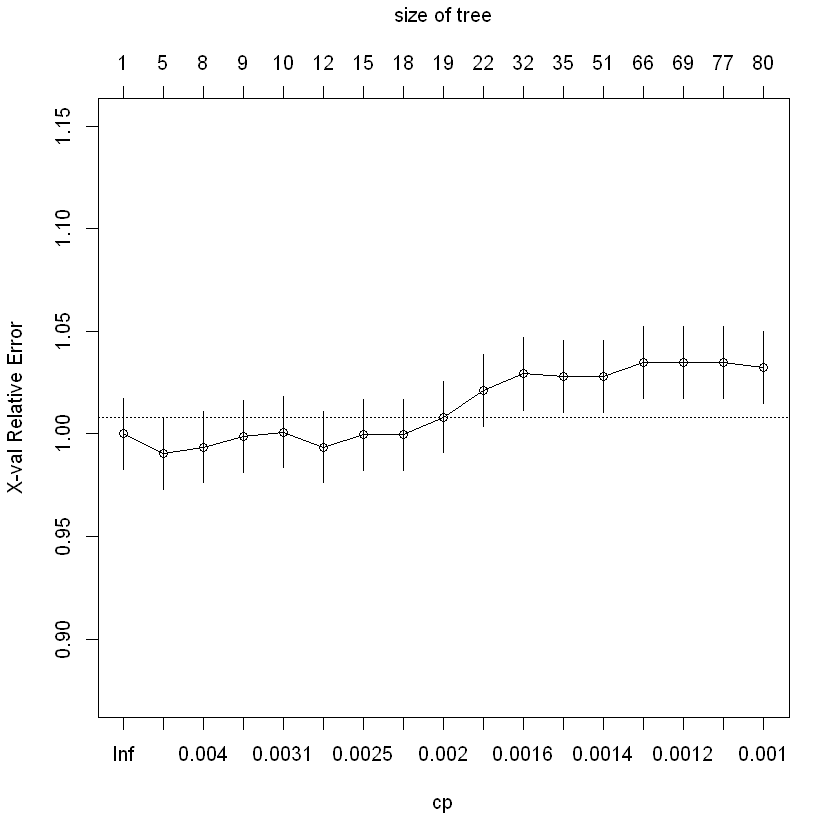

In [60]:
printcp(tree_undersample)

plotcp(tree_undersample)

In [61]:
tree_min_undersample <- tree_undersample$cptable[which.min(tree_undersample$cptable[,"xerror"]),"CP"]

tree_min_undersample

[1] 0.004414003

In [62]:
ptree_undersample <- prune(tree_undersample, cp = tree_min_undersample)

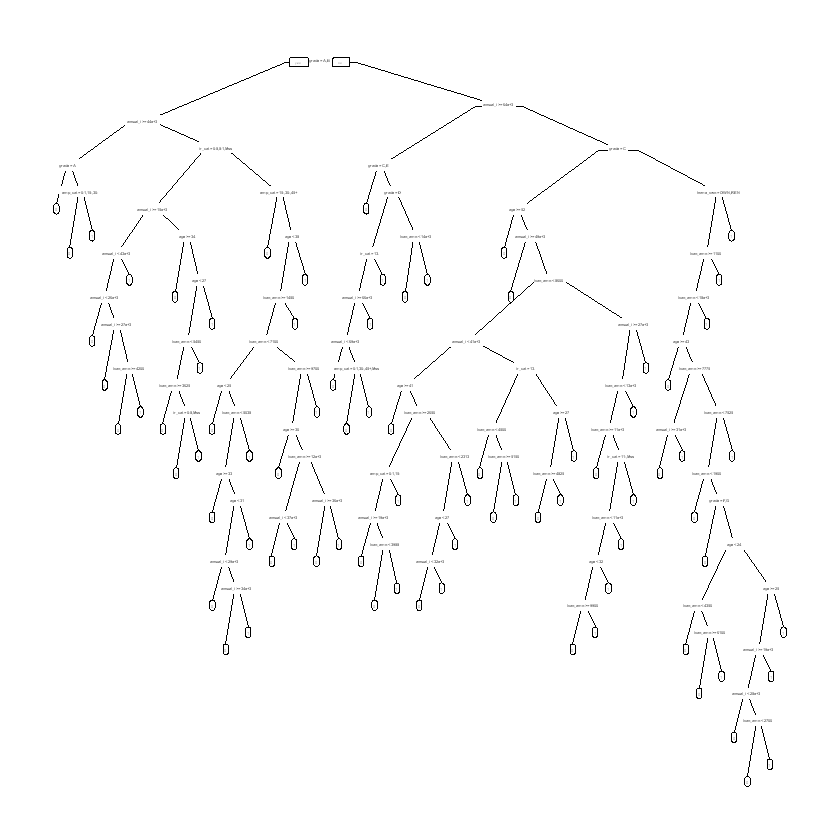

In [63]:
prp(tree_undersample)

Huge tree! Overfitting? Most probably, this shouldn't be happening, especially after us pruning the tree in the first place, with the best cp parameters.

In [64]:
pred_undersample <- predict(ptree_undersample, newdata = testing_set, type = "class") # making predictions.

confmat_undersample <- table(testing_set$loan_status, pred_undersample) # making the confusion matrix.
confmat_undersample # 0.086 Sensitivity

   pred_undersample
       0    1
  0 8522  140
  1  984   51

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testing_set$loan_status, predictor = pred_undersample_probs[,     2])

Data: pred_undersample_probs[, 2] in 8662 controls (testing_set$loan_status 0) < 1035 cases (testing_set$loan_status 1).
Area under the curve: 0.6058


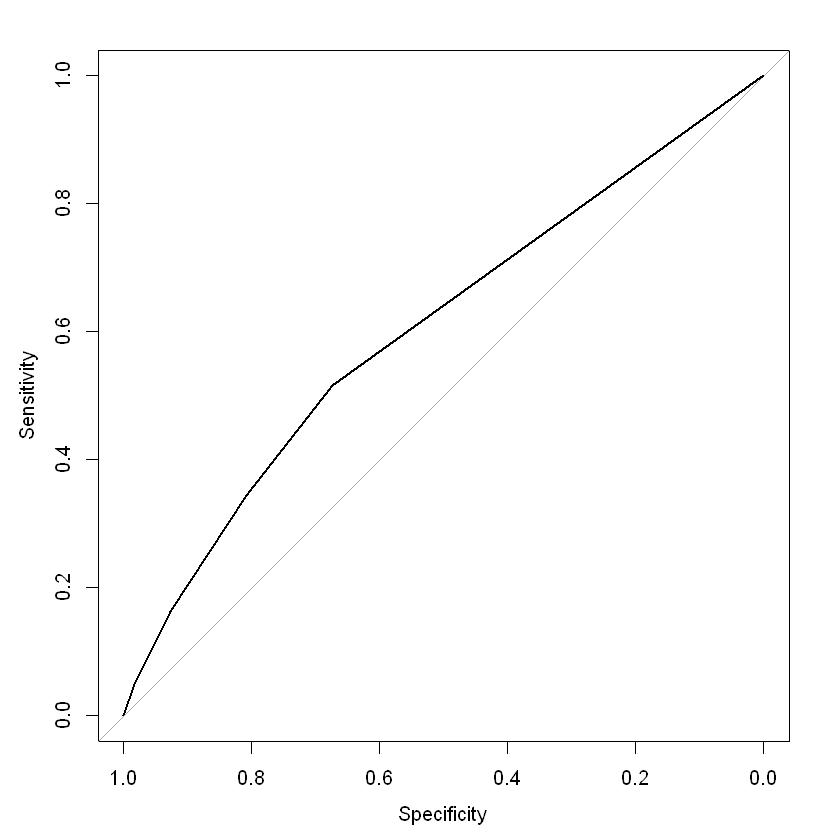

In [65]:
pred_undersample_probs <- predict(ptree_undersample, newdata = testing_set, type = 'prob')

auc_weights <- auc(testing_set$loan_status, pred_undersample_probs[, 2])

plot(roc(testing_set$loan_status, pred_undersample_probs[, 2]))

print(roc(testing_set$loan_status, pred_undersample_probs[, 2]))

Hmm. Not much difference from other approaches, but hey, on the positive side, atleast it's not mistakenly classifying non-defaulters as defaulters! Let's check the accuracy.

In [66]:
acc_undersample <- sum(diag(confmat_undersample)) / sum(confmat_undersample)

paste('Accuracy of the Decision Tree with Undersampling is :', paste(acc_undersample * 100, '%', sep = ''))

[1] "Accuracy of the Decision Tree with Undersampling is : 88.4087862225431%"

Good accuracy, but until we find a way to make it more robust to catch defaulters, it's not of much use.

# CONCLUSION

If I were to choose the best model from all of these, I would probably go for the Logistic Regression model with subset of features as it gives a **good sensitivity rate** as well as the highest **area under the curve** and a decent accuracy on top of it (accuracy has the least importance when dealing with imbalanced data ;)). 

| Model | Accuracy | Sensitivity | AUC |
| --- | --- | --- | --- |
| Logistic Regression with subset of features | 73.527% | 0.392 | 0.660 |
| Logistic Regression with all features | 73.311% | 0.392 | 0.655 |
| Decision Trees - Prior Probabilities | 86.975% | 0.098 | 0.6057 |
| Decision Trees - Loss Matrix | 47.963% | 0.7584 | 0.6265 |
| Decision Trees - Weighted Matrix | 88.398% | 0.0444 | 0.6056 |
| Decision Trees - Undersampling | 86.954% | 0.086 | 0.6058 |

There are a few other ways which have proven to work well for imbalanced data, like :

- SMOTE (Synthetic Minority Oversampling Technique) + Gradient Boosted Trees
- XGBoost (Inherently comes with algorithms that deal with imbalance in data)